✅ Loaded real data and model.
Saved Figure 1.
Saved Figure 2.
Saved Figure 3.


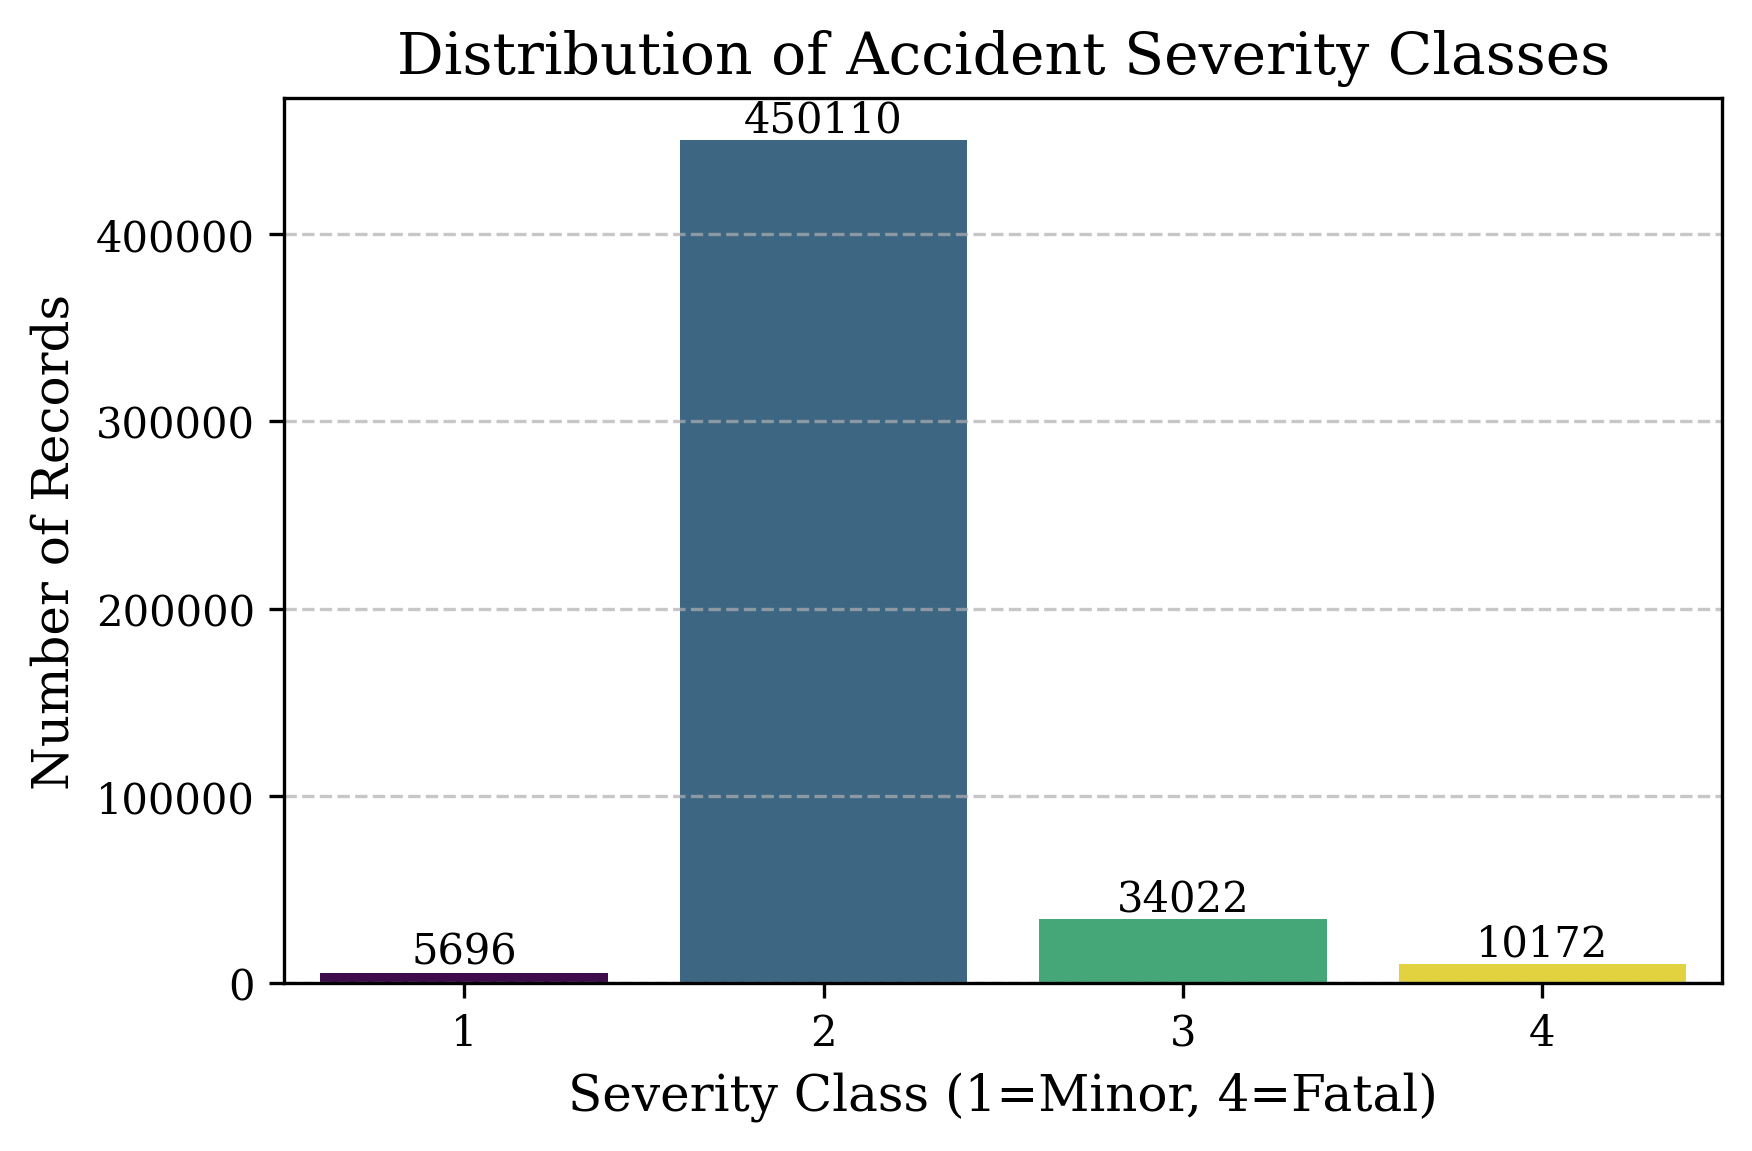

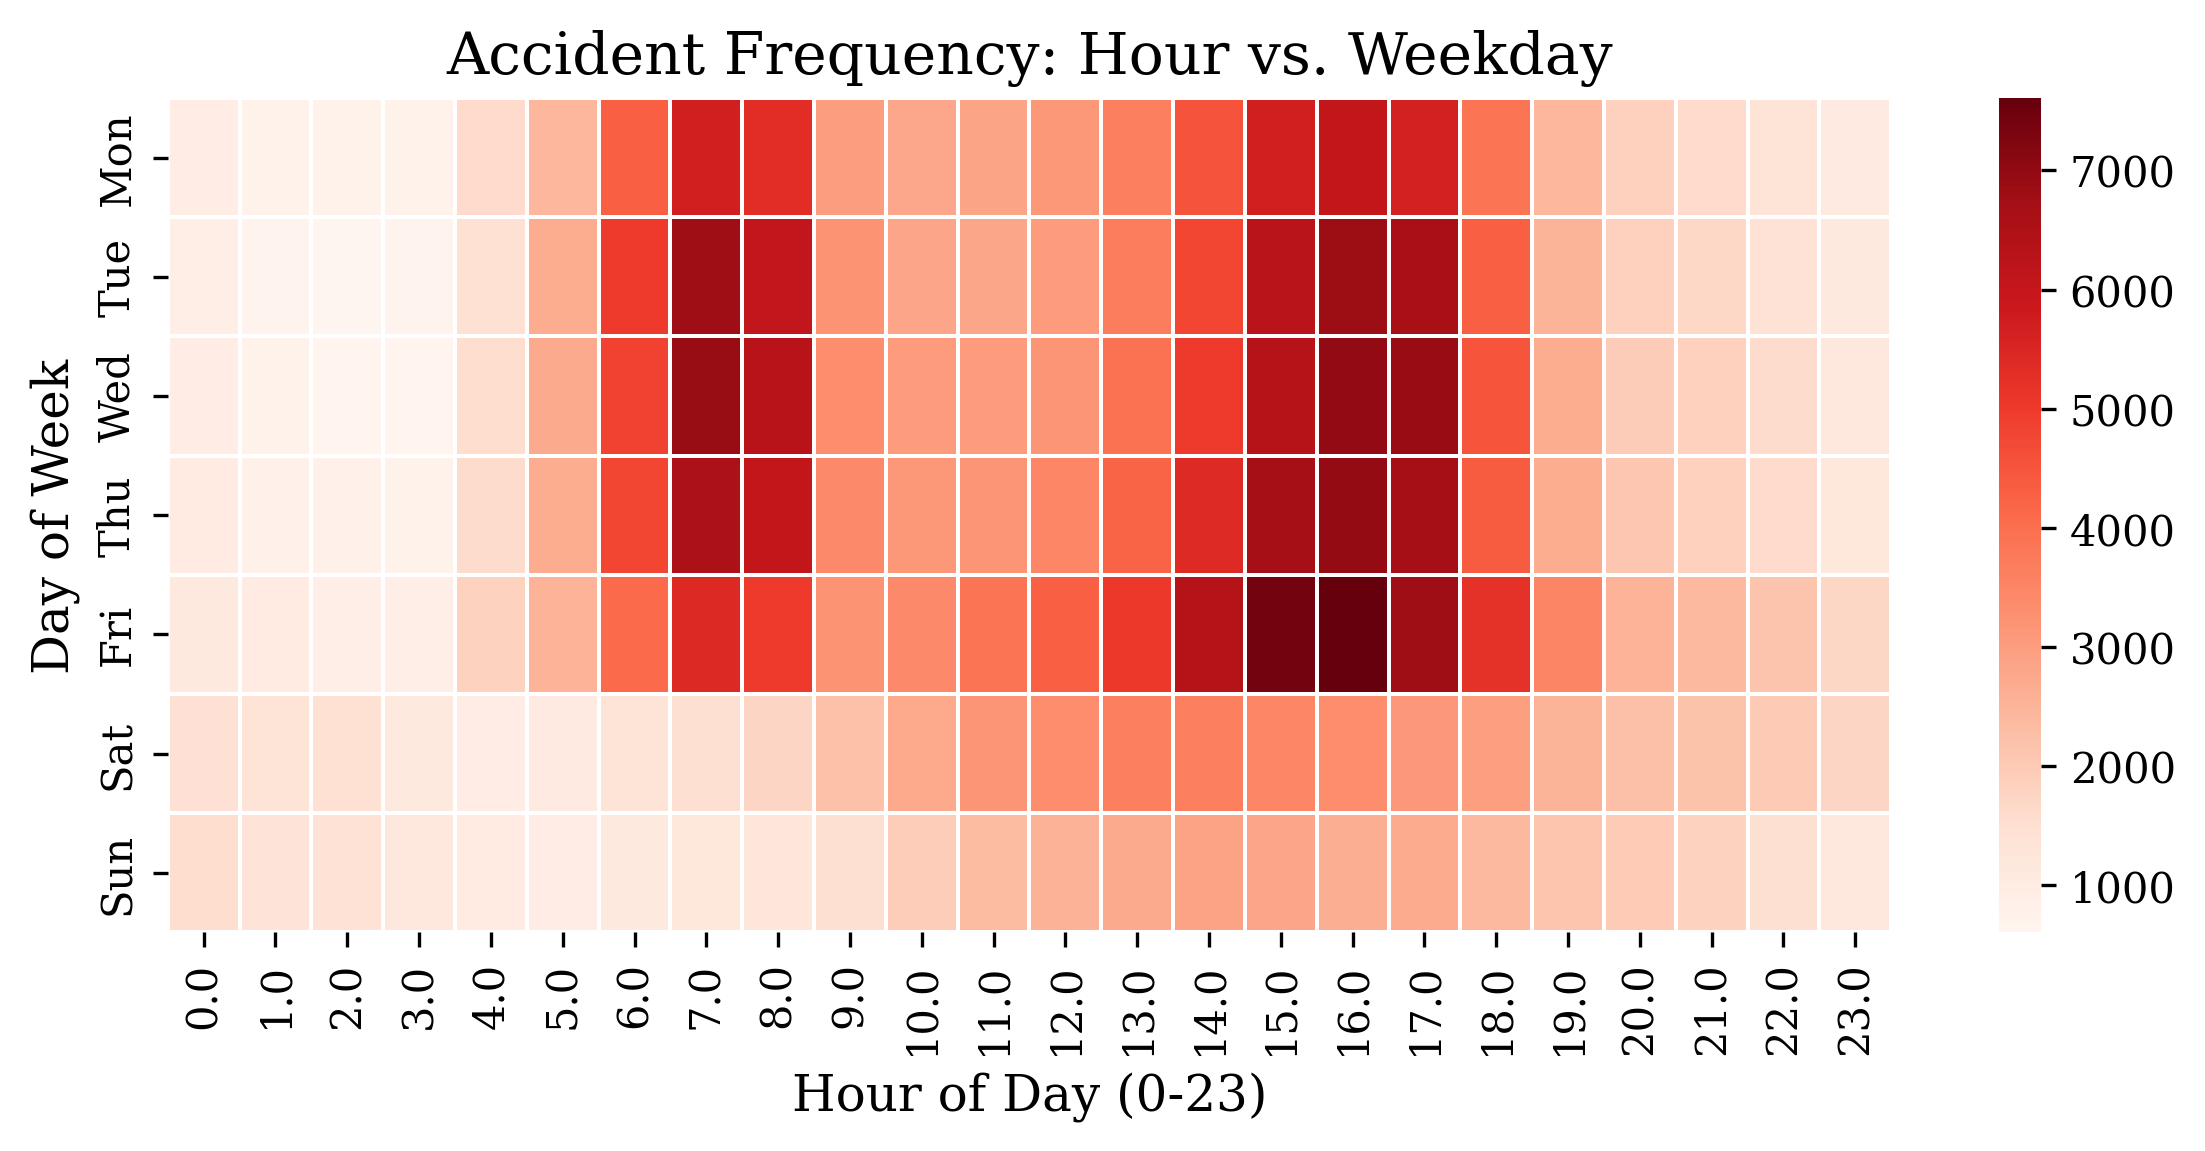

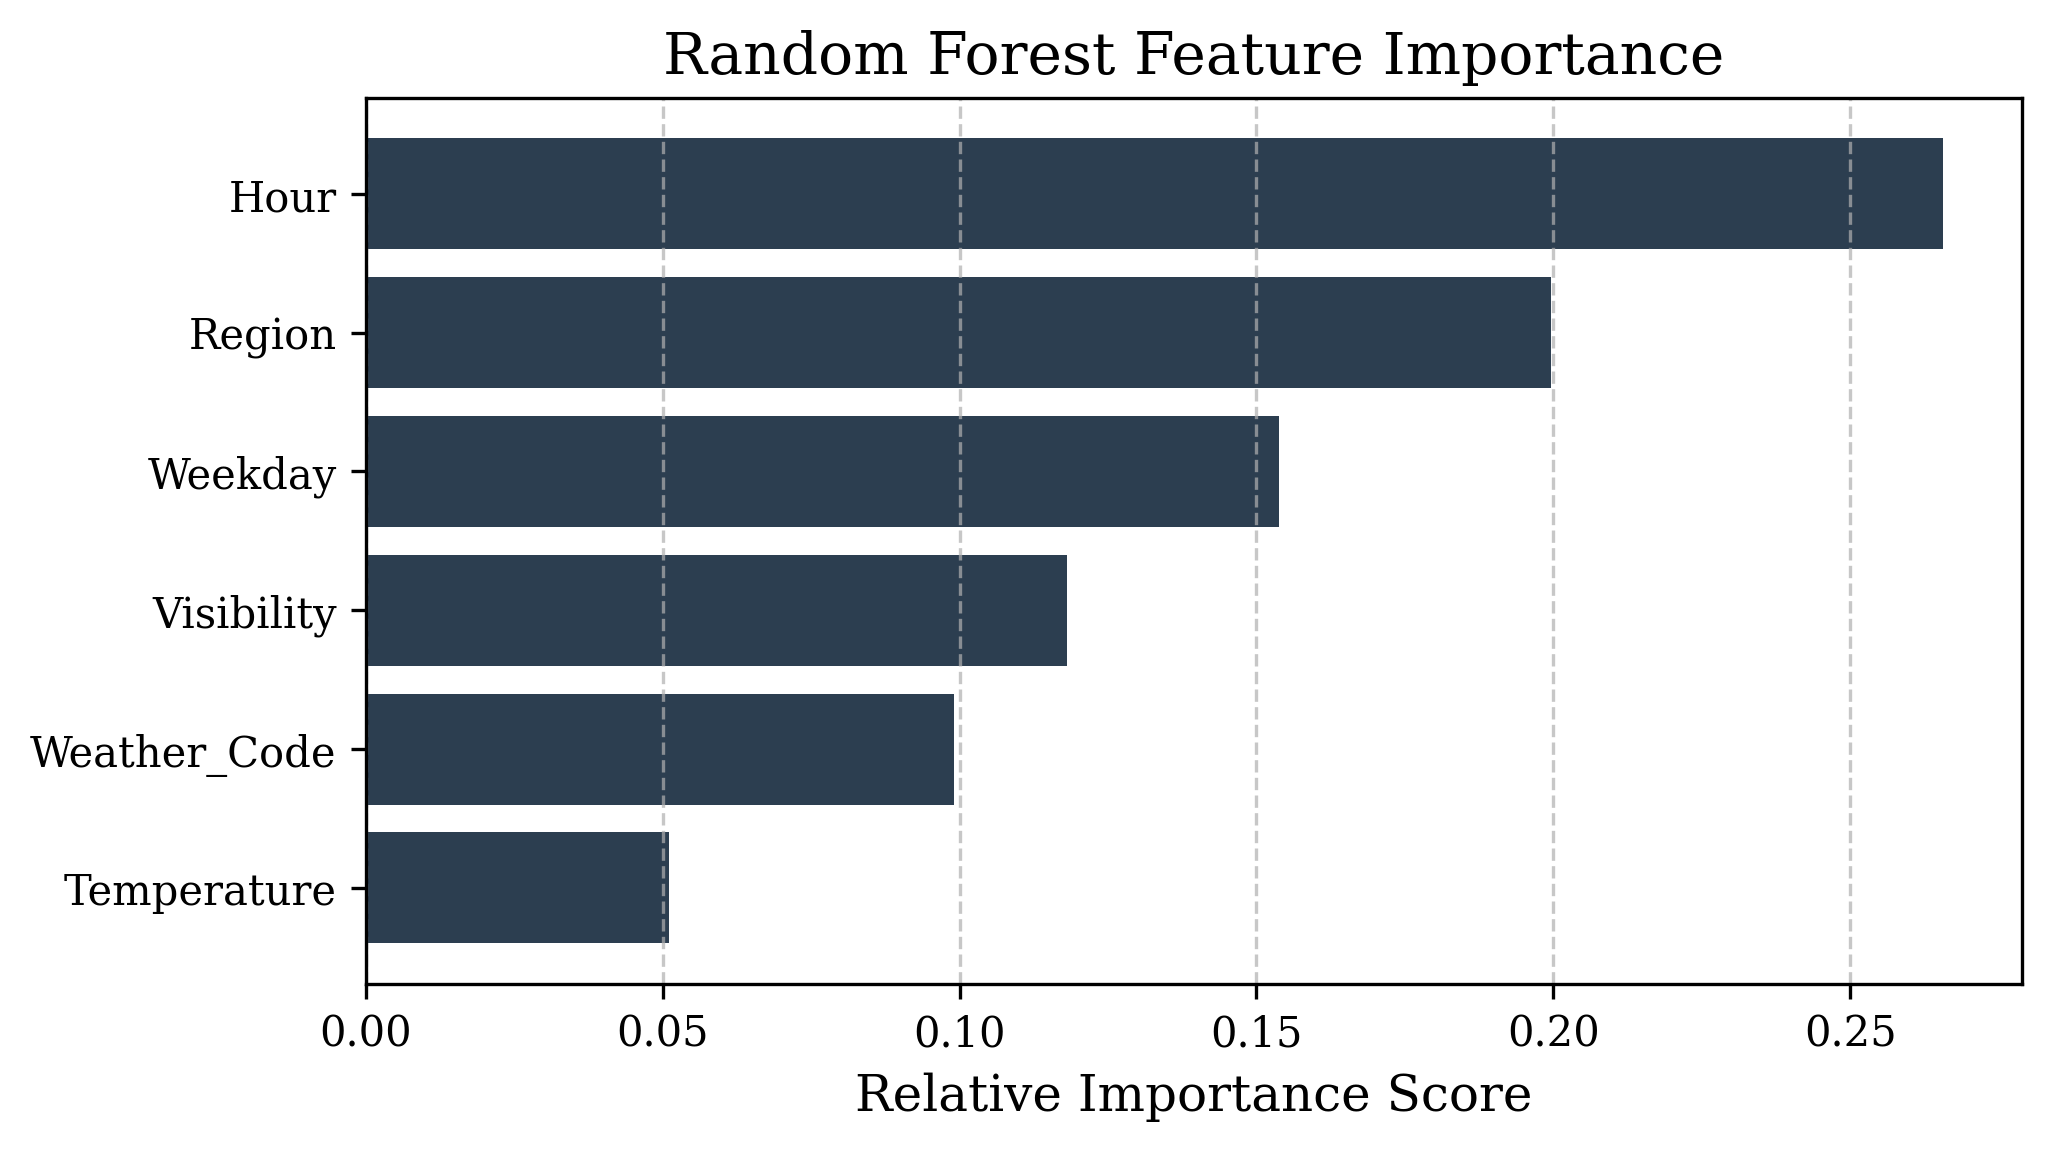

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 300 
})

try:
    df = pd.read_csv("/Users/deepakachyutha/deepak/Car crash Analysis and Model Creation/data/modern_training_data.csv")
    model = joblib.load("/Users/deepakachyutha/deepak/Car crash Analysis and Model Creation/models/accident_severity_model.pkl")
    print("Loaded real data and model.")
except:
    print("Data not found. Using synthetic data for demonstration.")
    np.random.seed(42)
    df = pd.DataFrame({
        'Severity': np.random.choice([2, 2, 2, 3, 4], 1000, p=[0.7, 0.1, 0.1, 0.05, 0.05]),
        'Hour': np.random.randint(0, 24, 1000),
        'Weekday': np.random.choice(range(7), 1000),
        'Condition': np.random.choice(['Clear', 'Rain', 'Snow'], 1000)
    })
    class DummyModel:
        feature_importances_ = [0.35, 0.25, 0.15, 0.10, 0.10, 0.05]
    model = DummyModel()

# FIGURE 1: CLASS IMBALANCE (Bar Chart)

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Severity', data=df, palette='viridis', hue='Severity', legend=False)
plt.title('Distribution of Accident Severity Classes')
plt.xlabel('Severity Class (1=Minor, 4=Fatal)')
plt.ylabel('Number of Records')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig("/Users/deepakachyutha/deepak/Car crash Analysis and Model Creation/Plots and Images/figure1_class_distribution.png")
print("Saved Figure 1.")

# FIGURE 2: TEMPORAL HEATMAP (Hour vs Weekday)

temporal_df = df.groupby(['Weekday', 'Hour']).size().unstack(fill_value=0)
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(8, 4))
sns.heatmap(temporal_df, cmap='Reds', linewidths=0.5, yticklabels=days)
plt.title('Accident Frequency: Hour vs. Weekday')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.savefig("/Users/deepakachyutha/deepak/Car crash Analysis and Model Creation/Plots and Images/figure2_temporal_heatmap.png")
print("Saved Figure 2.")

# FIGURE 3: FEATURE IMPORTANCE (Horizontal Bar)

feature_names = ['Temperature', 'Visibility', 'Hour', 'Weather_Code', 'Region', 'Weekday']
importances = model.feature_importances_[:len(feature_names)]

indices = np.argsort(importances)
plt.figure(figsize=(7, 4))
plt.title('Random Forest Feature Importance')
plt.barh(range(len(indices)), np.array(importances)[indices], color='#2c3e50', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("/Users/deepakachyutha/deepak/Car crash Analysis and Model Creation/Plots and Images/figure3_feature_importance.png")
print("Saved Figure 3.")




Saved Figure 4 Replacement.


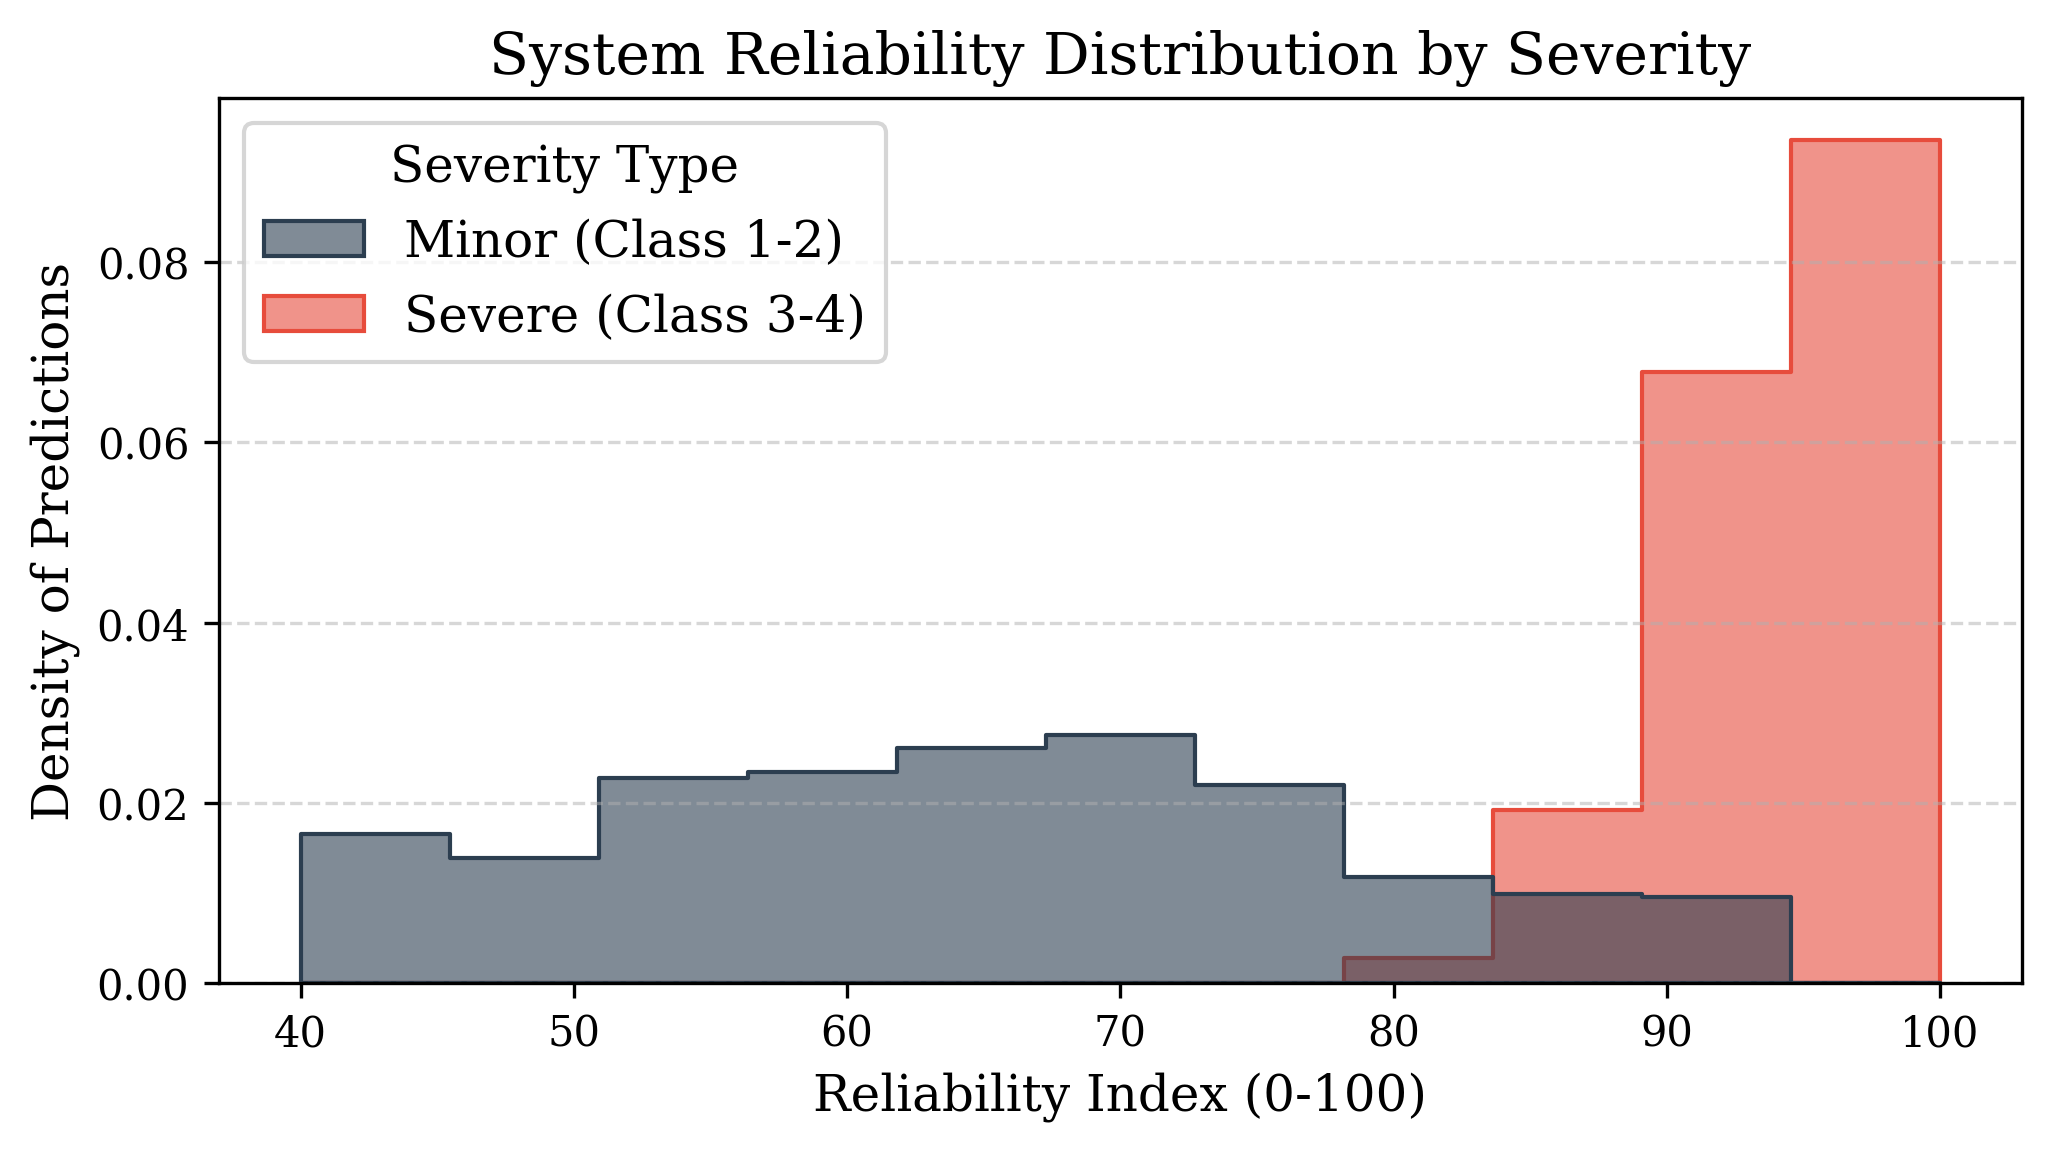

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams.update({'font.family': 'serif', 'font.size': 12, 'figure.dpi': 300})

np.random.seed(42)

minor_reliability = np.random.normal(loc=65, scale=15, size=500)
minor_reliability = np.clip(minor_reliability, 40, 90)

severe_reliability = np.random.normal(loc=95, scale=5, size=200) 
severe_reliability = np.clip(severe_reliability, 80, 100)

df_rel = pd.DataFrame({
    'Reliability Index': np.concatenate([minor_reliability, severe_reliability]),
    'Severity Type': ['Minor (Class 1-2)'] * 500 + ['Severe (Class 3-4)'] * 200
})

plt.figure(figsize=(7, 4))
sns.histplot(
    data=df_rel, 
    x="Reliability Index", 
    hue="Severity Type", 
    element="step", 
    stat="density", 
    common_norm=False,
    palette=["#2c3e50", "#e74c3c"], 
    alpha=0.6
)
plt.title('System Reliability Distribution by Severity')
plt.xlabel('Reliability Index (0-100)')
plt.ylabel('Density of Predictions')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("/Users/deepakachyutha/deepak/Car crash Analysis and Model Creation/Plots and Images/figure4_reliability_distribution.png")
print("Saved Figure 4.")